# HT4 Arboles de decisión

Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: https://github.com/angelargd8/Proyecto2.2-MDD

In [2]:
#cargar los datos
import pandas as pd 
df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

# 2. Arbol de regresion para predecir el precio de las casas usando todas las variables

In [3]:
from sklearn.metrics import r2_score
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo
modelo = DecisionTreeRegressor() 

# Entrenar el modelo
modelo.fit(X_train, y_train)


y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))


Error cuadrático medio (MSE) en entrenamiento: 0.0
Error cuadrático medio (MSE) en prueba: 1799646155.4666667
R^2 en entrenamiento: 1.0
R^2 en prueba: 0.7718304908700995


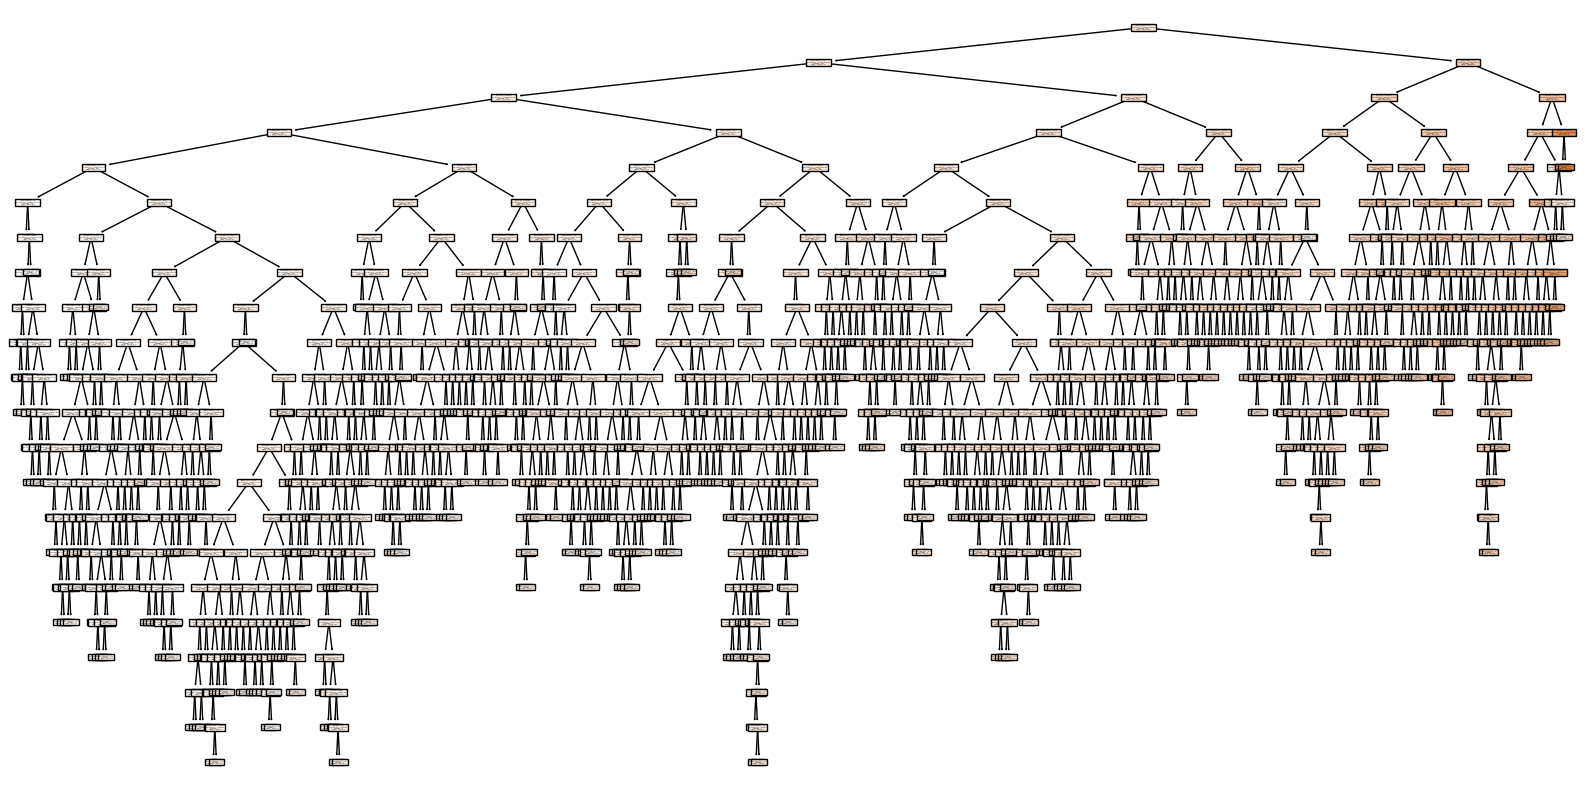

In [4]:
# Visualizar el árbol de regresión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns)
plt.show()


# 3. Análisis del resultado

Al observar los resultados que el MSE es 0 y el R^2 es 1.  Mientras qwue el MSE en prueva es muy alto y el R^2 muy pequeño, lo que nos indica es que el modelo esta sobreajustado.
Por lo tanto, significa que el modelo ha aprendido bien los detalles y ruido del conjunto de entrenamiento, pero no generaliza bien los datos nuevos.

# 4. Haga, al menos, 3 modelos más, cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
# df_train = pd.read_csv('path_to_your_data.csv')  # Asegúrate de cargar tus datos correctamente

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Definir el grid de parámetros
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

# Crear el modelo GridSearchCV
modelo1 = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Ajustar el modelo GridSearchCV
modelo1.fit(X_train, y_train)

#Resultados
print('-'*100)
print("Modelo 1")
print(f'Mejor configuracion del modelo 1: {modelo1.best_params_}')

#Entrenar el modelo con la mejor configuracion
best_model1 = modelo1.best_estimator_
best_model1.fit(X_train, y_train)

#predicciones
y_pred_train1 = best_model1.predict(X_train)
y_pred_test1 = best_model1.predict(X_test)

#aalizar el modelo

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train1))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test1))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train1))
print("R^2 en prueba:", r2_score(y_test, y_pred_test1))

# Repetir para los otros dos modelos con diferentes configuraciones de hiperparámetros
param_grid2 = {
    'regressor__max_depth': [5, 10, 15],
    'regressor__min_samples_split': [2, 4, 6]
}

modelo2 = GridSearchCV(pipeline, param_grid=param_grid2, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo2.fit(X_train, y_train)
print('-'*100)
print("Modelo 2")
print(f'Mejor configuración del modelo 2: {modelo2.best_params_}')
best_model2 = modelo2.best_estimator_
best_model2.fit(X_train, y_train)
y_pred_train2 = best_model2.predict(X_train)
y_pred_test2 = best_model2.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train2))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test2))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train2))
print("R^2 en prueba:", r2_score(y_test, y_pred_test2))

param_grid3 = {
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [5, 10, 15]
}

modelo3 = GridSearchCV(pipeline, param_grid=param_grid3, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo3.fit(X_train, y_train)
print('-'*100)
print("Modelo 3")

print(f'Mejor configuración del modelo 3: {modelo3.best_params_}')
best_model3 = modelo3.best_estimator_
best_model3.fit(X_train, y_train)
y_pred_train3 = best_model3.predict(X_train)
y_pred_test3 = best_model3.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train3))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test3))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train3))
print("R^2 en prueba:", r2_score(y_test, y_pred_test3))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
Modelo 1
Mejor configuracion del modelo 1: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10}
Error cuadrático medio (MSE) en entrenamiento: 224152810.30732158
Error cuadrático medio (MSE) en prueba: 1482756062.4426095
R^2 en entrenamiento: 0.9660737183097757
R^2 en prueba: 0.8120076427806528
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------------------------------------------------------------------------------------------------
Modelo 2
Mejor configuración del modelo 2: {'regressor__max_depth': 10, 'regressor__min_samples_split': 6}
Error cuadrático medio (MSE) en entrenamiento: 132231297.23214445
Error cuadrático medio (MSE) en prueba: 1842906567.2934296
R^2 en entrenamiento: 0.9799863484557214
R^2 en prueba: 0.7663456865927218
Fitting 5 folds for each of 9 candidates, totalling 45 fits
--

Al observar las metricas de los 3 modelos, el error más bajo del MSE es el que tiene un mejor rendimiento, en este caso es el modelo 2. Mientras que con en el R^2 más alto indica mejor la variabilidad de los datos. En este caso, también es el modelo 2. Por lo tanto, el modelo 2 es el mejor modelo para predecir el precio de las casas.

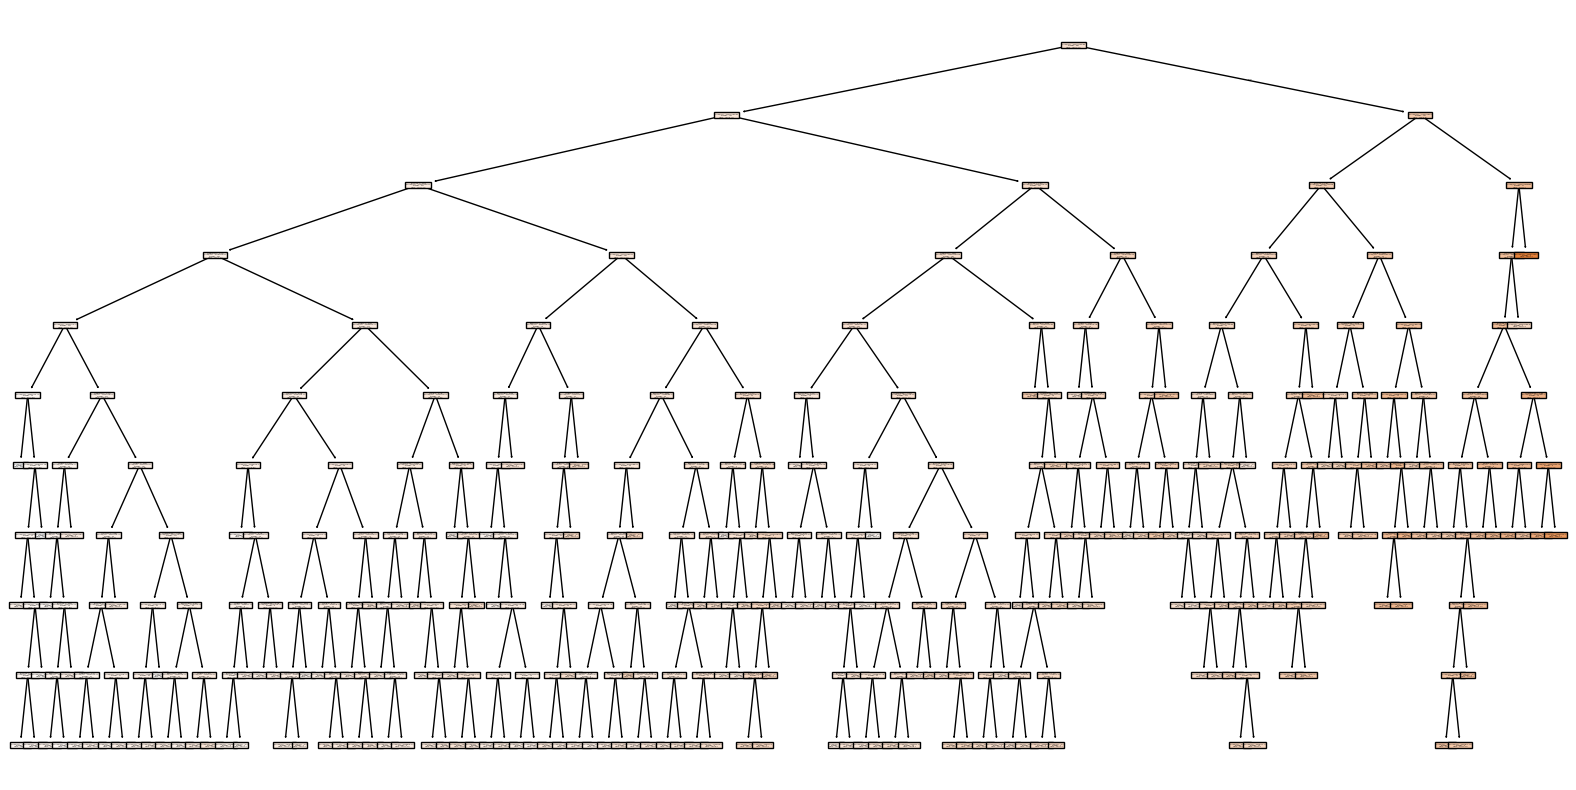

In [6]:
# arbol para el mejor modelo
plt.figure(figsize=(20, 10))
plot_tree(best_model2.named_steps['regressor'], filled=True, feature_names=X.columns)
plt.show()


Al comparar entre los resultados de la regresion lineal y el árbol de regresión el MSE, tiene un mejor rendimiento el de la regresión lineal con un valor más bajo. Mientras que en el coeficiente ed determinación R^2 más alto indica una mejor variabilidad, en esta caso el de la regresión lineal es más alto. Y el RMSE, tiene un valor más bajo. Por lo tanto, el modelo con la regresion lineal con sobreajuste parece ser un mejor modelo.

# 6. Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados


SalePrice_Class
Economic        385
High            381
Intermediate    355
Name: count, dtype: int64


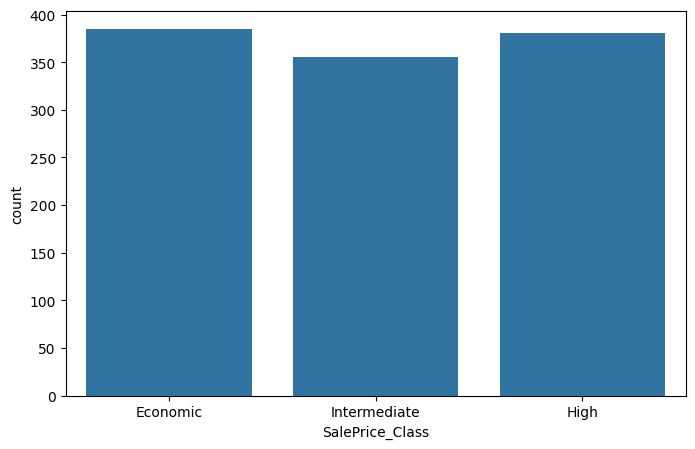

In [33]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='SalePrice_Class', data=df_train)

plt.show()


Se usa la distribución de SalesPrice, para que se refleje de una manera representativas los rangos de los precios. Los cuantiles de 33% y 66% dividen los datos en partes aproximadamente iguales para que las categorias sean balanceadas en tamaño. Low tiene el percentil 33, medium tiene el percentil 66 y high tiene el percentil 100. Porque al usar cuantiles en lugar de rangos especificos se adapta la clasificacion a la distribución real de los datos.

# 7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las casas, no incluya el precio de venta para entrenar el modelo

C:\Users\Francis\AppData\Local\Temp\ipykernel_3420\1134108227.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_set['Cluster'] = km.fit_predict(X_pca)


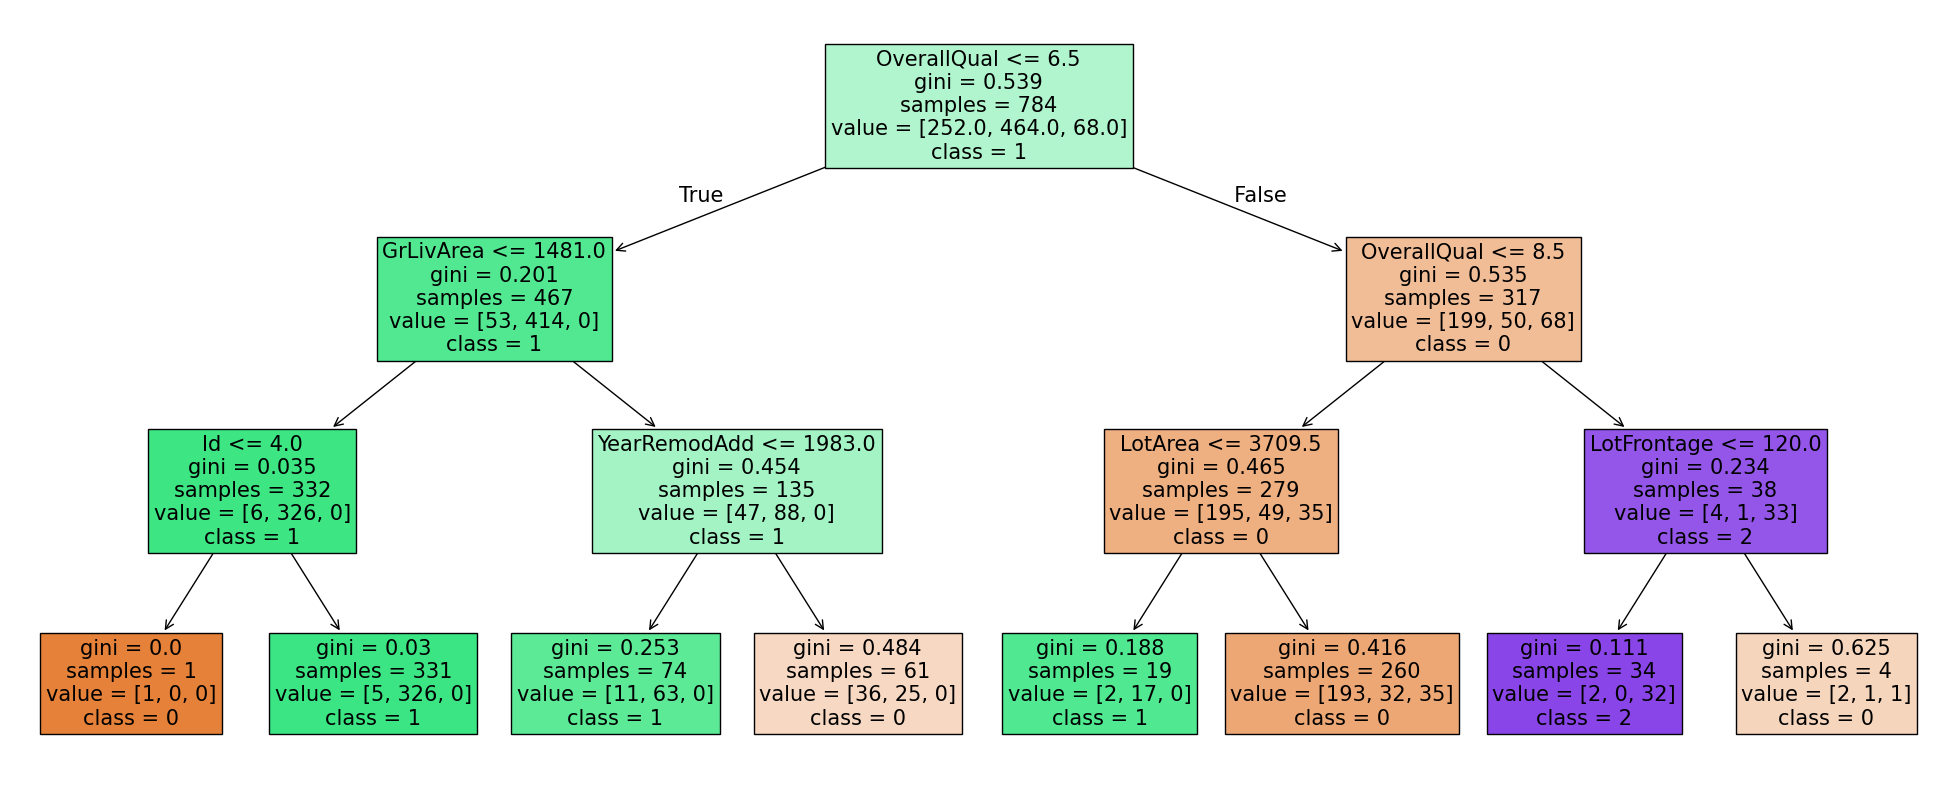

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Balancear los datos
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)
df_train = df_numerico

cluster_set = df_numerico[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

X_pca = PCA(n_components=2).fit_transform(cluster_set)
km = KMeans(n_clusters=3, random_state=42).fit(X_pca)

cluster_set['Cluster'] = km.fit_predict(X_pca)
centroides = km.cluster_centers_

tem = df_train[df_train.columns]
object_cols = tem.select_dtypes(include=['object']).columns
clustered_data = pd.get_dummies(tem, columns=object_cols, drop_first=True)
clustered_data['SpThird'] = cluster_set['Cluster']
clustered_data.pop('SalePrice')
clustered_data.groupby('SpThird').size()

y = clustered_data.pop('SpThird')
X_ct = clustered_data
X_train, X_test, y_train, y_test = train_test_split(
    X_ct, y, test_size=0.3, train_size=0.7, random_state=42
)
arbol = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42) 
arbol = arbol.fit(X_train, y_train) 
plt.figure(figsize=(25,10))
tree.plot_tree(arbol, feature_names=clustered_data.columns,
               class_names=['0','1','2'], filled=True, fontsize=15)
plt.show()


Se calisficaron en 3 clusters los datos por medio de las variables que están más relacionadas con el precio de las casas, de esta forma podríamos ver dentro de que categoría entra y predecir mejor los precios y otros factores de las casas. La mayoría de los valores gini estan cercanos a 0 o son menores a 0.4, lo que indica que la clasificación se está dando bien. 

# 8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar. 

In [ ]:
y_pred = arbol.predict(X_test)

# Calcular la precisión del modelo (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7953

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       115
           1       0.89      0.85      0.87       185
           2       0.89      0.46      0.61        37

    accuracy                           0.80       337
   macro avg       0.82      0.71      0.74       337
weighted avg       0.81      0.80      0.79       337



El accuracy del modelo es de 0.7, lo que indica que la predicción está bien, más no es perfecta. Es importante medir el modelo con otras técnicas para indicar si hay factores que afectan la predicción o el modelo está funcionando correctamente. 

# 9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores


Confusion Matrix:
[[45  2 14]
 [ 1 66 16]
 [16 15 50]]


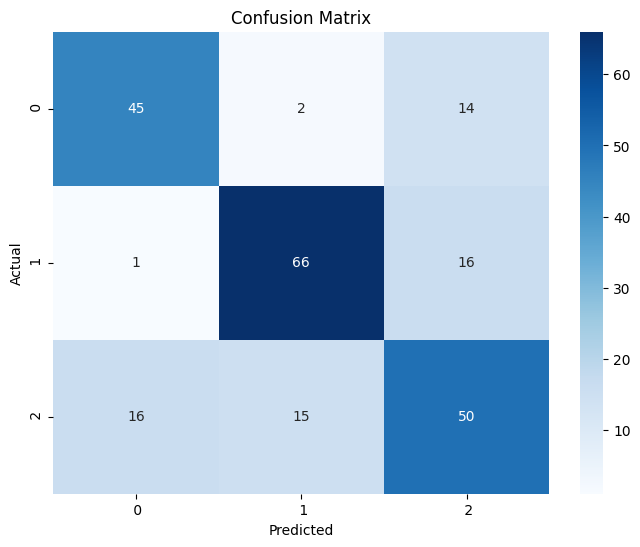

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=[' 0', ' 1', ' 2'], 
            yticklabels=[' 0', ' 1', ' 2'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

La matriz resultante es prometedora, ya que muestra que el modelo no muestra errores significativos y que la diagonal (los datos correctos). Sin embargo, hay algunos datos que no fueron predichos de manera correcta, lo que puede indicar que el modelo se está equivocando en algún punto, aunque no con frecuencia. 


# 10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior?

Precisión media del modelo con validación cruzada: 0.7333
Desviación estándar: 0.0411
Reporte de clasificación del modelo con validación cruzada:
              precision    recall  f1-score   support

    Economic       0.77      0.77      0.77       385
        High       0.85      0.76      0.80       381
Intermediate       0.59      0.66      0.62       355

    accuracy                           0.73      1121
   macro avg       0.74      0.73      0.73      1121
weighted avg       0.74      0.73      0.74      1121

Matriz de confusión del modelo con validación cruzada:
[[298   7  80]
 [ 11 291  79]
 [ 78  44 233]]


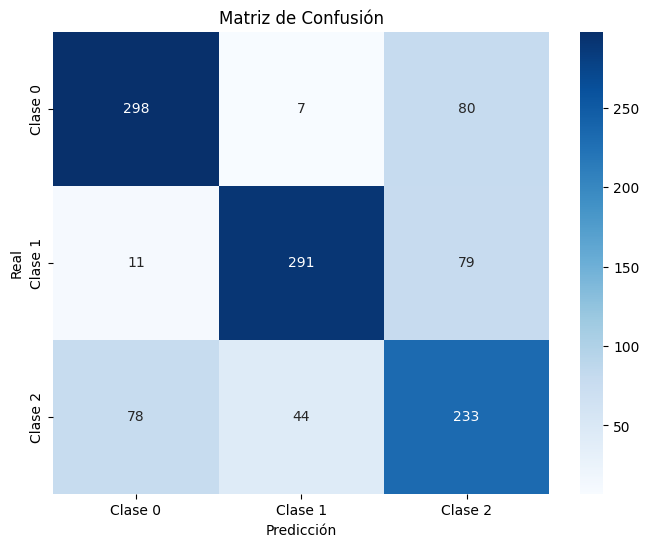

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

arbol_cv = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

scores = cross_val_score(arbol_cv, X_ct, y, cv=5, scoring='accuracy')

print(f"Precisión media del modelo con validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

y_pred_cv = cross_val_predict(arbol_cv, X_ct, y, cv=5)

print("Reporte de clasificación del modelo con validación cruzada:")
print(classification_report(y, y_pred_cv))

# Matriz de confusión
print("Matriz de confusión del modelo con validación cruzada:")
print(confusion_matrix(y, y_pred_cv))
cm = confusion_matrix(y, y_pred_cv)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


El accuracy es un poco menor al modelo anterior, pero a grandes rasgos los resultados son bastante similares.  Esto indica que la validación cruzada no ha afectado drásticamente el rendimiento, pero puede haber proporcionado una mejor generalización. 

# 11. Haga al menos, 3 modelos más, cambiando la profundidad del árbol. ¿Cuál funcionó mejor?

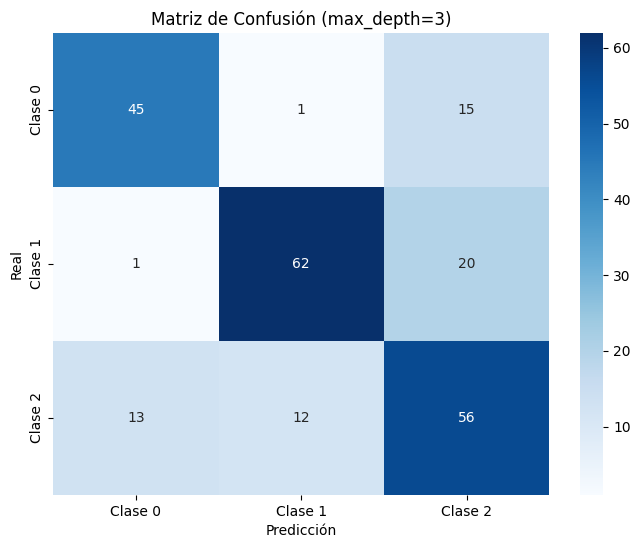

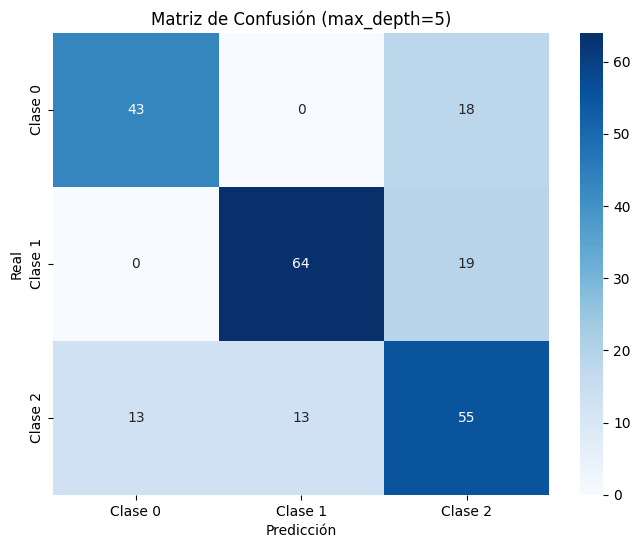

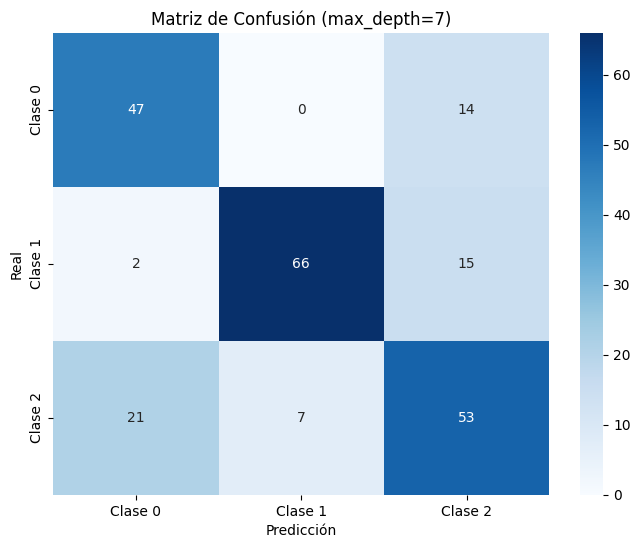

Resultados para max_depth=3:
Accuracy: 0.7244
Reporte de clasificación:
              precision    recall  f1-score   support

    Economic       0.76      0.74      0.75        61
        High       0.83      0.75      0.78        83
Intermediate       0.62      0.69      0.65        81

    accuracy                           0.72       225
   macro avg       0.73      0.73      0.73       225
weighted avg       0.73      0.72      0.73       225



Resultados para max_depth=5:
Accuracy: 0.7200
Reporte de clasificación:
              precision    recall  f1-score   support

    Economic       0.77      0.70      0.74        61
        High       0.83      0.77      0.80        83
Intermediate       0.60      0.68      0.64        81

    accuracy                           0.72       225
   macro avg       0.73      0.72      0.72       225
weighted avg       0.73      0.72      0.72       225



Resultados para max_depth=7:
Accuracy: 0.7378
Reporte de clasificación:
              prec

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

depth_values = [3, 5, 7]

results = {}

for depth in depth_values:
    # Crear y entrenar el árbol de decisión
    arbol = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    arbol.fit(X_train, y_train)

    y_pred = arbol.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[depth] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': cm
    }

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
    plt.title(f'Matriz de Confusión (max_depth={depth})')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Comparar los resultados de los modelos
for depth, result in results.items():
    print(f"Resultados para max_depth={depth}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Reporte de clasificación:")
    print(result['classification_report'])
    print("\n")


Se puede observar que la última matriz es la que se aleja más de presentar resultados correctos y precisos con el valor de 7. El hecho de que la matriz de confusión para el modelo con max_depth=7 se aleje más de los resultados correctos y precisos indica que el modelo podría estar sobreajustándose (overfitting) a los datos de entrenamiento. Esto es lo que generalmente ocurre cuando un árbol de decisión tiene una profundidad demasiado alta. Pero el accuracy no es significativamente más bajo, por lo que rechazaremos esta suposición 

# 12. Repita los análisis usando random forest como algoritmo de predicción, explique sus resultados comparando ambos algoritmos.

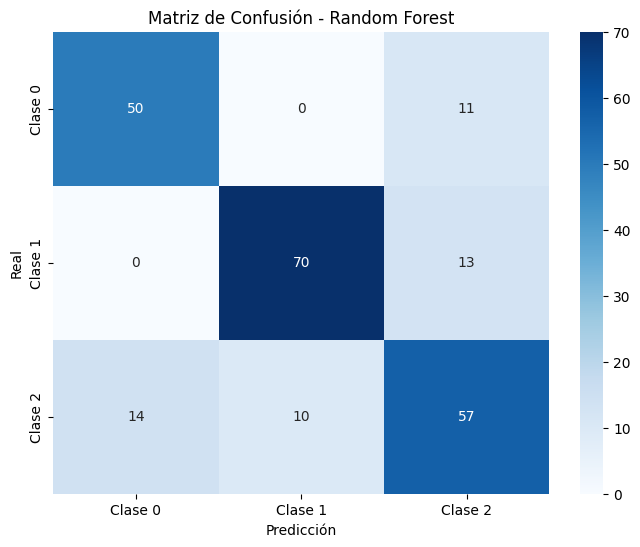

Accuracy - Random Forest: 0.7867
Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

    Economic       0.78      0.82      0.80        61
        High       0.88      0.84      0.86        83
Intermediate       0.70      0.70      0.70        81

    accuracy                           0.79       225
   macro avg       0.79      0.79      0.79       225
weighted avg       0.79      0.79      0.79       225



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción con el modelo entrenado
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print(f"Accuracy - Random Forest: {accuracy_rf:.4f}")
print("Reporte de Clasificación - Random Forest:")
print(class_report_rf)


Los modelos muestran un rendimiento similar, en ambos casos un accuracy casi igual con decimales de diferencia. Aunque ambos modelos tienen un rendimiento bastante cercano, el Árbol de Decisión tiene un pequeño mejor desempeño en términos de accuracy en este caso. Sin embargo, la diferencia es pequeña y podría no ser estadísticamente significativa en muchos contextos.  

El Random Forest es un modelo más robusto porque combina varios árboles de decisión, lo que debería permitirle manejar la variabilidad en los datos y sobreajustarse menos en comparación con un único árbol de decisión. La pequeña diferencia en accuracy podría deberse a varios factores, como la complejidad de los datos o la forma en que se distribuyen las clases